### Laboratorio 1<br>
### Text image & recognition<br>
### Marlon Pérez<br>
### Carne 2200346

In [1]:
import cv2
import matplotlib.pyplot as plt    
import numpy as np

### PROBLEMA 1 

In [2]:
def colors(img_name, color=0):
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    alto = img.shape[0]
    ancho = img.shape[1]
    imagen_resul = np.zeros((alto,ancho,3))
    
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            #print(pixel)
            
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            
            if color == 1:
                imagen_resul[i,j] = [blue,0,0]
            elif color == 2:
                imagen_resul[i,j] = [0,green,0]
            elif color == 3:
                imagen_resul[i,j] = [0,0,red]
            elif color == 10:
                imagen_resul[i,j] = [0,green,red]
            elif color == 20:
                imagen_resul[i,j] = [blue,green,0]
            elif color == 30:
                imagen_resul[i,j] = [blue,0,red]
        
        
    return cv2.imwrite("imagen_resul.jpg", imagen_resul)
    
    
    

In [4]:
colors("paris.jpg",color=3)

True

### PROBLEMA 2

In [5]:
def convertir_color(imagen1, imagen2,imagen3):
    imagen1_azul= cv2.imread(imagen1)
    imagen2_verde= cv2.imread(imagen2)
    imagen3_rojo= cv2.imread(imagen3)
    
    alto = imagen1_azul.shape[0]
    ancho = imagen1_azul.shape[1]
    imagen_color = np.zeros((alto,ancho,3), dtype= np.uint8)
    imagen_color[:,:,0] = imagen1_azul[:,:,0]
    imagen_color[:,:,1] = imagen2_verde[:,:,1]
    imagen_color[:,:,2] = imagen3_rojo[:,:,2]
    
    return cv2.imwrite("imagen a color.jpg", imagen_color)

In [6]:
#usar ruta de la imagen o simplemente guardar la imagen en la misma carpeta que el notebook de codigo
convertir_color(r"C:\Users\Marlon Daniel\Desktop\Datasciencie\text image & recognition\imagen3\perro_salida_gray_azul.jpg",
            r"C:\Users\Marlon Daniel\Desktop\Datasciencie\text image & recognition\imagen3\perro_salida_gray_verde.jpg",
            r"C:\Users\Marlon Daniel\Desktop\Datasciencie\text image & recognition\imagen3\perro_salida_gray_rojo.jpg"
              )

True

### PROBLEMA 3

In [30]:
def colores_gris(imagen_color):

    imagen_color = cv2.imread(imagen_color)

    #r"C:\Users\Marlon Daniel\Desktop\Datasciencie\text image & recognition\islandia.jpg"

    blue_channel, green_channel, red_channel = cv2.split(image_color)

    return cv2.imwrite('Gris Azul.jpg', blue_grayscale), cv2.imwrite('Gris Verde.jpg', green_grayscale),cv2.imwrite('Gris Rojo.jpg', red_grayscale)

In [31]:
#usar ruta de la imagen o simplemente guardar la imagen en la misma carpeta que el notebook de codigo
colores_gris(r"C:\Users\Marlon Daniel\Desktop\Datasciencie\text image & recognition\islandia.jpg")

(True, True, True)

### Problema 4

In [104]:
def histogramas(imagen,color):

    def calcular_promedio(imagen_bn):
        promedio_bn = np.mean(imagen_bn)
        return promedio_bn

    picture = cv2.imread(imagen)
    imagen_bn = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
    promedio_bn = calcular_promedio(imagen_bn)
    hist_bn, bin_edges = np.histogram(imagen_bn.ravel(), bins=256, range=[0, 256])
    #histograma_bn = [sum(row)/len(row) for row in imagen_bn]
    #histograma_bn = cv2.calcHist([imagen_bn], [0], None, [256], [0, 256])

    if color not in [0,1,2]:
        print("Error: El color debe ser 0 (azul), 1 (verde) o 2 (rojo).")
        return 

    canal = picture[:,:,color]
    histograma = cv2.calcHist([canal],[0],None,[256],[0,256])

    promedio_color = np.mean(canal)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(histograma, color='blue')
    ax1.set_title('Histograma de Canal de Colores')
    ax1.set_xlabel('Intensidad del píxel')
    ax1.set_ylabel('Cantidad de píxeles')
    ax1.axvline(x=promedio_color, color='red', linestyle='dashed', linewidth=2)
    ax1.text(promedio_color + 5, 0.9 * ax1.get_ylim()[1], f'Media: {promedio_color:.2f}', color='red')

    ax2.plot(hist_bn, color='black')
    ax2.set_title('Histograma en Escala de Grises')
    ax2.set_xlabel('Intensidad del píxel')
    ax2.set_ylabel('Cantidad de píxeles')
    ax2.axvline(x=promedio_bn, color='red', linestyle='dashed', linewidth=2)
    ax2.text(promedio_bn + 5, 0.9 * ax2.get_ylim()[1], f'Media: {promedio_bn:.2f}', color='red')


    plt.tight_layout()  
    plt.show()


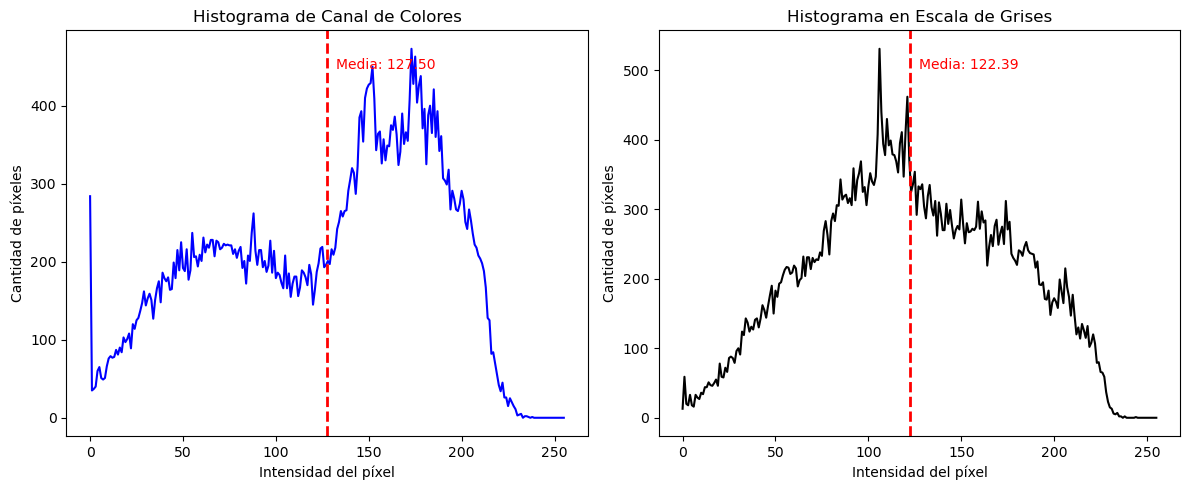

In [111]:
histogramas("islandia.jpg",0)